# Initial Exploration

In this notebook, we do some preliminary exploration using some out-of-the-box tools in OpenCV based on our readings using the tried-and-tested Haar featured-based computer vision methods. Our goals were to see how it would fare on the provided data set, and also to  familiarize ourselves with OpenCV and image processing.

Read more about the method here:

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html

In [14]:
import numpy as np
import cv2
import pylab
import imageio

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [15]:
cat_cascade = cv2.CascadeClassifier('haarcascade_frontalcatface.xml')
cat_ext_cascade = cv2.CascadeClassifier('haarcascade_frontalcatface_extended.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [24]:
# Citation: This code uses the following tutorial as a base and builds on top of it.
# https://blogs.oracle.com/meena/cat-face-detection-using-opencv 

SF = 1.05
N = 6
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)

def detect_cat(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # This function returns tuple rectangle starting coordinates x,y, width, height
    cats = cat_cascade.detectMultiScale(gray, scaleFactor=SF, minNeighbors=N)
    cats_ext = cat_ext_cascade.detectMultiScale(gray, scaleFactor=SF, minNeighbors=N)
    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=SF, minNeighbors = N)
    return (img, cats, cats_ext, eyes)

def save_image(img, cats, cats_ext, eyes, filename):
    for (x,y,w,h) in cats:
        img = cv2.rectangle(img, (x, y), (x + w, y + h), RED, 2)

    for (x,y,w,h) in cats_ext:
        img = cv2.rectangle(img, (x, y), (x + w, y + h), GREEN, 2)

    for (x, y, w, h) in eyes:
        img = cv2.rectangle(img, (x, y), (x + w, y + h), BLUE, 2)

    cv2.imwrite(f"{filename}.jpg", img)

In [29]:
def process_video(filename, sample_rate=10):
    """
    A function that takes in a filename for a video
    determines if there is a cat present.
    
    You can pass in a sample rate. It is set
    by default to 10, so that only every 10th
    frame will get parsed. 
    """
    capture = cv2.VideoCapture(filename)    
    frame_count = 0
    cat_detected = 0
    eyes_detected = []
    
    while capture.isOpened():
        playing, frame = capture.read()
        
        if playing and frame_count % sample_rate == 0:
            img, cats, cats_ext, eyes = detect_cat(frame)
            """
            We'll ignore cat for now. I'm not 100% sure on this,
            but I think the cat_ext seems to do a better job on
            detecting a good cat. 
            """
            if len(cats_ext) > 0:
                cat_detected += 1
                save_image(img, cats, cats_ext, eyes, f"test_output/cat_detected_{frame_count}")

            if len(eyes) > 0:
                eyes_detected.append(eyes.shape[0])
            
        if not playing:
            break

        frame_count += 1

    capture.release()
    return frame_count, cat_detected, eyes_detected

In [30]:
frame_count, cat_detected, eyes_detected = process_video("videos/MVI_3414.MP4")

Here are some cats that were detected in the video, and the resulting frames:

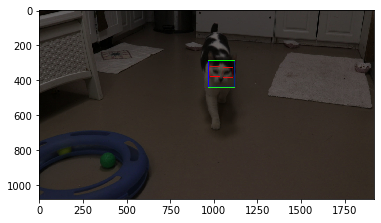

In [31]:
cat1 =  mpimg.imread("test_output/cat_detected_0.jpg")
plt.imshow(cat1)

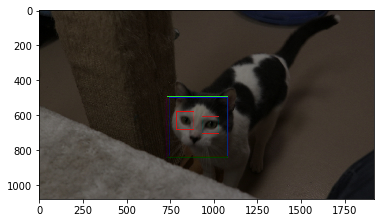

In [32]:
cat1 =  mpimg.imread("test_output/cat_detected_230.jpg")
plt.imshow(cat1)

In [33]:
total_frames_sampled = frame_count / 10
print(f"Of total frames sampled, a cat was detected {cat_detected / total_frames_sampled * 100}% of the time.")
print(f"Of total frames sampled, eyes were detected {len(eyes_detected) / total_frames_sampled * 100}% of the time.")

Of total frames sampled, a cat was detected 22.47191011235955% of the time.
Of total frames sampled, eyes were detected 92.69662921348313% of the time.


But we can also see that the eye detection is probably quite a bit more noisier and prone to error.

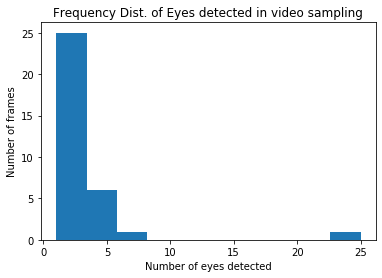

In [34]:
plt.hist(eyes_detected)
plt.xlabel("Number of eyes detected")
plt.ylabel("Number of frames")
plt.title("Frequency Dist. of Eyes detected in video sampling")
plt.show()

Below are some sample outputs of images where more than two eyes were detected. We note that it picks up on spots on the cats fur, random items in the background, etc. This indicates that we should use eye detection cautiously; if we include it as a heuristic, we'd have to go to some lengths to ensure that what we are picking up on are indeed eyes.

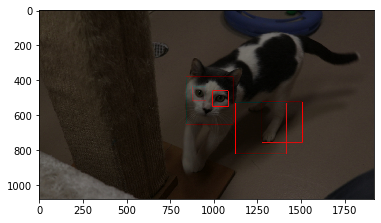

In [35]:
extra_eyes1 = mpimg.imread("test_output/extra_eyes_200.jpg")
plt.imshow(extra_eyes1)

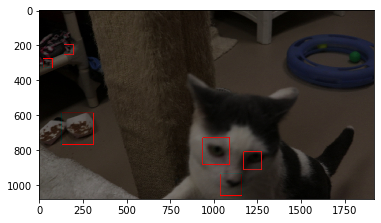

In [36]:
extra_eyes2 =  mpimg.imread("test_output/extra_eyes_280.jpg")
plt.imshow(extra_eyes2)

### FURTHER EXPERIMENTATION

In [25]:
# I've noticed that sometimes, cat_cascade detects a cat whereas cat_extension doesn't.
# I haven't looked into this too much, so I wanted to modify the function
# so that the images where this was the case gets outputted.
# It looks like cat_cascade is a bit oversensitive,
# As these are rather shoddy images.

def process_video(filename, sample_rate=10):
    """
    A function that takes in a filename for a video
    determines if there is a cat present.
    
    You can pass in a sample rate. It is set
    by default to 10, so that only every 10th
    frame will get parsed. 
    """
    capture = cv2.VideoCapture(filename)    
    frame_count = 0
    
    while capture.isOpened():
        playing, frame = capture.read()
        
        if playing and frame_count % sample_rate == 0:
            img, cat, cat_ext, eyes = detect_cat(frame)
            print(cat, cat_ext)
            if len(cat) > 0 and len(cat_ext) == 0:
                print("cat_cascade picked up on a cat face, whereas cat_ext_cascade didn't. Saving image.")
                save_image(img, cat, cat_ext, eyes, f"test_output/cat_non_ext_{frame_count}")
        
        if not playing:
            break

        frame_count += 1

    capture.release()

process_video("videos/MVI_3414.MP4")

[[971 291 148 148]] [[968 289 154 154]]
[[926 347 163 163]] [[928 352 157 157]]
[[910 343 183 183]] [[911 346 181 181]]
[[873 401 205 205]] [[877 408 195 195]]
[[762 384 233 233]] [[762 389 233 233]]
[[644 430 253 253]] ()
cat_cascade picked up on a cat face, whereas cat_ext_cascade didn't. Saving image.
() ()
() ()
() ()
() ()
() ()
() ()
() ()
() ()
[[931 700 250 250]] ()
cat_cascade picked up on a cat face, whereas cat_ext_cascade didn't. Saving image.
() ()
() ()
() ()
() ()
() ()
[[842 382 270 270]] ()
cat_cascade picked up on a cat face, whereas cat_ext_cascade didn't. Saving image.
[[772 472 302 302]] [[772 478 296 296]]
[[759 490 320 320]] [[757 493 321 321]]
[[745 499 335 335]] [[733 495 349 349]]
() ()
() ()
() ()
[[ 36  70 102 102]] ()
cat_cascade picked up on a cat face, whereas cat_ext_cascade didn't. Saving image.
() ()
() ()
() ()
() ()
() ()
() ()
() ()
() ()


You can also look at the above output for an idea of what the data returned by the detectMultiScale looks like. 

Below are the images that vanilla cat detector picked up on, but the extension did not.

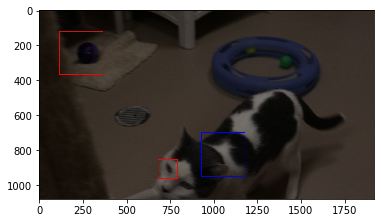

In [37]:
non_ext1 =  mpimg.imread("test_output/cat_non_ext_140.jpg")
plt.imshow(non_ext1)

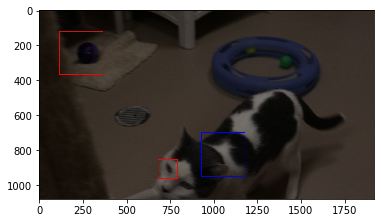

In [38]:
non_ext2 =  mpimg.imread("test_output/cat_non_ext_200.jpg")
plt.imshow(non_ext1)

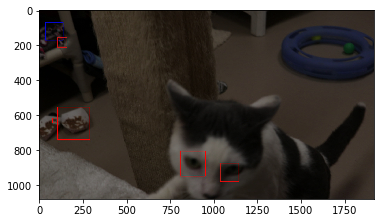

In [28]:
non_ext3 =  mpimg.imread("test_output/cat_non_ext_270.jpg")
plt.imshow(non_ext3)